In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import shap

In [2]:
df = pd.read_csv("D:/conda_envs/fraud_detection/DATA/ccf/creditcard.csv")

In [3]:
df.shape

(284807, 31)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
fraud_percentage = df["Class"].value_counts(normalize=True) * 100
fraud_percentage

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Exploratory Data Analysis

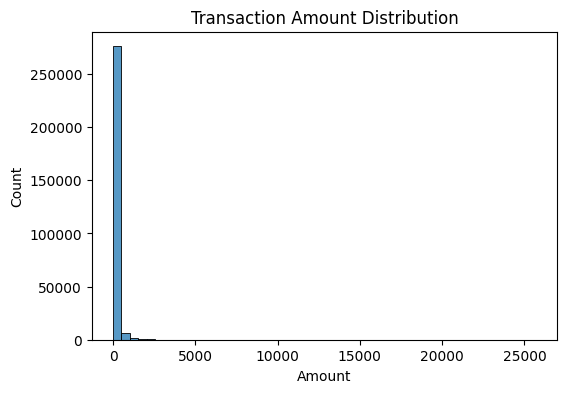

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(df["Amount"], bins=50)
plt.title("Transaction Amount Distribution")
plt.show()

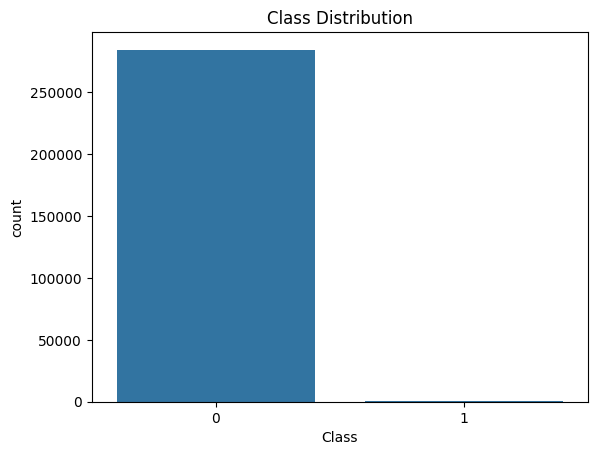

In [10]:
sns.countplot(x="Class", data=df)
plt.title("Class Distribution")
plt.show()

Behavioral Feature Engineering

In [11]:
#Log Transform the Amount
df["Amount_log"] = np.log1p(df["Amount"])

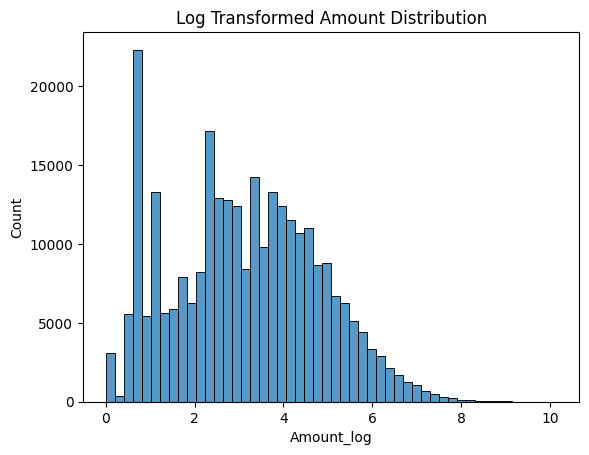

In [12]:
sns.histplot(df["Amount_log"], bins=50)
plt.title("Log Transformed Amount Distribution")
plt.show()

In [13]:
#Create Time-Based Features
df["Hour"] = (df["Time"] // 3600) % 24

In [14]:
df = df.sort_values("Time")

In [15]:
df["Rolling_Transaction_Count"] = df["Amount"].rolling(window=10).count()

In [16]:
df.head(20000)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,Amount_log,Hour,Rolling_Transaction_Count
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,5.014760,0.0,NaN
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1.305626,0.0,NaN
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,5.939276,0.0,NaN
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,4.824306,0.0,NaN
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4.262539,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,30714.0,-2.574861,-3.159709,-0.066802,-2.342403,-4.109518,1.277935,4.314675,-0.973984,-0.154314,...,0.349402,0.108809,-0.341502,0.329811,-0.314936,1200.00,0,7.090910,8.0,10.0
19996,30716.0,1.172969,0.221508,0.622677,0.650761,-0.406620,-0.690456,0.049612,-0.127383,-0.079778,...,0.413152,0.118688,0.100692,-0.010056,0.022251,12.99,0,2.638343,8.0,10.0
19997,30716.0,-1.061245,0.721735,0.569426,-0.145278,-0.093611,-1.423052,0.712580,0.209606,-0.392517,...,0.767622,-0.357250,0.267907,0.220411,0.121707,60.00,0,4.110874,8.0,10.0
19999,30717.0,1.071615,0.013662,1.505439,1.409847,-0.960577,-0.015836,-0.549520,0.130743,0.683760,...,0.634578,0.307968,-0.415722,0.096872,0.042688,9.99,0,2.396986,8.0,10.0


Create Risk Signals (Fraud Indicators)

In [17]:
#Rule 1:High Amount Spike
df["Rolling_Mean_Amount"] = df["Amount"].rolling(window=20).mean()

In [18]:
df["Amount_Deviation"] = df["Amount"] - df["Rolling_Mean_Amount"]

In [19]:
#Rule 2:Unusual Hour Risk
df["Night_Transaction"] = df["Hour"].apply(lambda x: 1 if x >= 0 and x <= 4 else 0)

In [20]:
#Rule 3: Rapid Transaction Burst
df["Rolling_Transaction_Count"]

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
284802    10.0
284803    10.0
284805    10.0
284804    10.0
284806    10.0
Name: Rolling_Transaction_Count, Length: 284807, dtype: float64

In [21]:
df["High_Frequency_Risk"] = df["Rolling_Transaction_Count"].apply(lambda x: 1 if x >= 10 else 0)

In [22]:
#Overall Rule-Based Risk Score
df["Rule_Risk_Score"] = (
    (df["Amount_Deviation"] > df["Amount_Deviation"].quantile(0.95)).astype(int)
    + df["Night_Transaction"]
    + df["High_Frequency_Risk"]
)

In [23]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Amount,Class,Amount_log,Hour,Rolling_Transaction_Count,Rolling_Mean_Amount,Amount_Deviation,Night_Transaction,High_Frequency_Risk,Rule_Risk_Score
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,149.62,0,5.014760,0.0,NaN,NaN,NaN,1,0,1
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,2.69,0,1.305626,0.0,NaN,NaN,NaN,1,0,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,378.66,0,5.939276,0.0,NaN,NaN,NaN,1,0,1
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,123.50,0,4.824306,0.0,NaN,NaN,NaN,1,0,1
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,69.99,0,4.262539,0.0,NaN,NaN,NaN,1,0,1


In [24]:
df.groupby("Rule_Risk_Score")["Class"].mean()

Rule_Risk_Score
1    0.001354
2    0.004297
3    0.011158
Name: Class, dtype: float64

In [25]:
#Process Features before modelling
df = df.dropna()  # remove initial NaNs from rolling

In [26]:
X = df.drop(["Class"], axis=1)
y = df["Class"]

In [27]:
X = X.drop(["Time"], axis=1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [29]:
#Handle Imbalance(SMOTE)
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [30]:
#Train XGBoost Model
model = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    scale_pos_weight=1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

model.fit(X_train_res, y_train_res)

`use_label_encoder` is deprecated in 1.7.0.


,objective,'binary:logistic'
,use_label_encoder,False
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [31]:
#Evaluation
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56860
           1       0.70      0.90      0.79        98

    accuracy                           1.00     56958
   macro avg       0.85      0.95      0.89     56958
weighted avg       1.00      1.00      1.00     56958

ROC-AUC: 0.98308735383003


In [32]:
# Final Risk Score =
# (0.7 × ML probability) + (0.3 × normalized rule score)

In [33]:
# Normalize rule score (0–1 scale)
df["Rule_Risk_Normalized"] = df["Rule_Risk_Score"] / df["Rule_Risk_Score"].max()

# Add ML probabilities to dataframe
df.loc[X_test.index, "ML_Probability"] = y_prob

# Fill others as 0
df["ML_Probability"] = df["ML_Probability"].fillna(0)

# Final combined risk score
df["Final_Risk_Score"] = (
    0.7 * df["ML_Probability"] + 
    0.3 * df["Rule_Risk_Normalized"]
)

In [34]:
test_df = df.loc[X_test.index].copy()

In [35]:
test_df.groupby(
    pd.qcut(test_df["Final_Risk_Score"], 4, duplicates="drop")
)["Class"].mean()


The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


Final_Risk_Score
(0.09999000000000001, 0.10001]    0.000070
(0.10001, 0.10007]                0.000000
(0.10007, 0.10055]                0.000070
(0.10055, 0.98125]                0.006742
Name: Class, dtype: float64

Visualizations

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


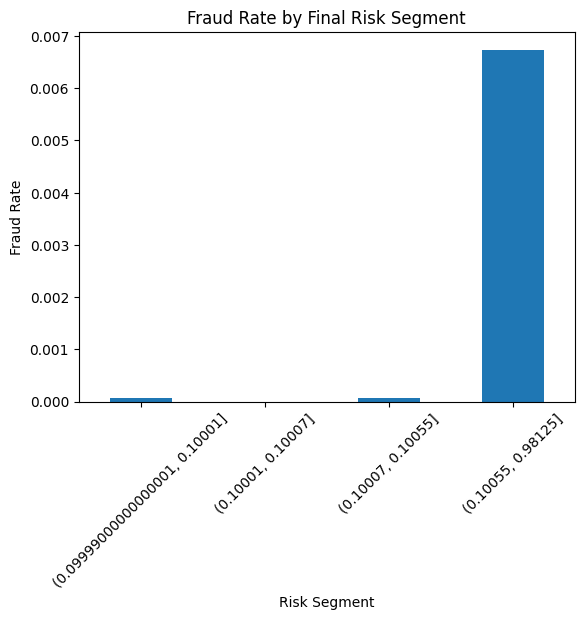

In [36]:
# Fraud Rate per Risk Bucket (Bar Chart)
risk_analysis = test_df.groupby(
    pd.qcut(test_df["Final_Risk_Score"], 4, duplicates="drop")
)["Class"].mean()

risk_analysis.plot(kind="bar")
plt.title("Fraud Rate by Final Risk Segment")
plt.ylabel("Fraud Rate")
plt.xlabel("Risk Segment")
plt.xticks(rotation=45)
plt.show()

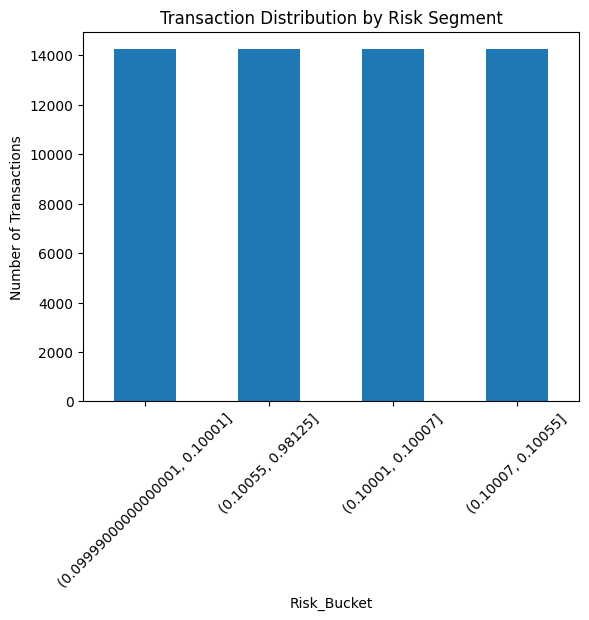

In [37]:
# Transaction Count per Segment
test_df["Risk_Bucket"] = pd.qcut(
    test_df["Final_Risk_Score"], 4, duplicates="drop"
)

test_df["Risk_Bucket"].value_counts().plot(kind="bar")
plt.title("Transaction Distribution by Risk Segment")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()


The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


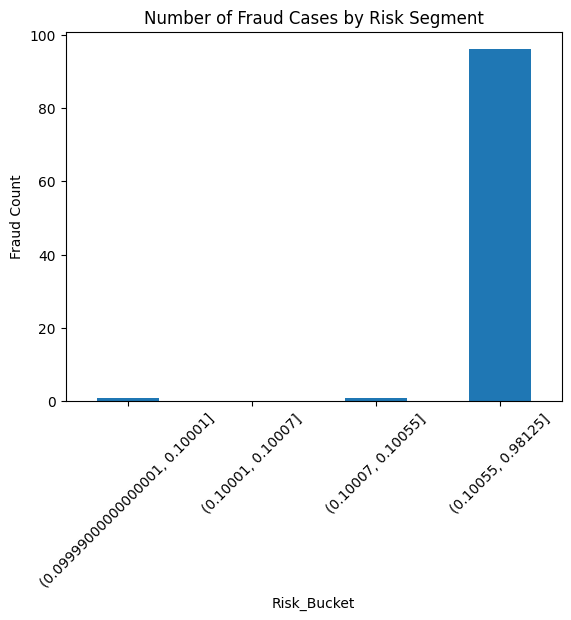

In [38]:
# Fraud Concentration %
fraud_counts = test_df.groupby("Risk_Bucket")["Class"].sum()
fraud_counts.plot(kind="bar")
plt.title("Number of Fraud Cases by Risk Segment")
plt.ylabel("Fraud Count")
plt.xticks(rotation=45)
plt.show()

INTERPRETATIONS

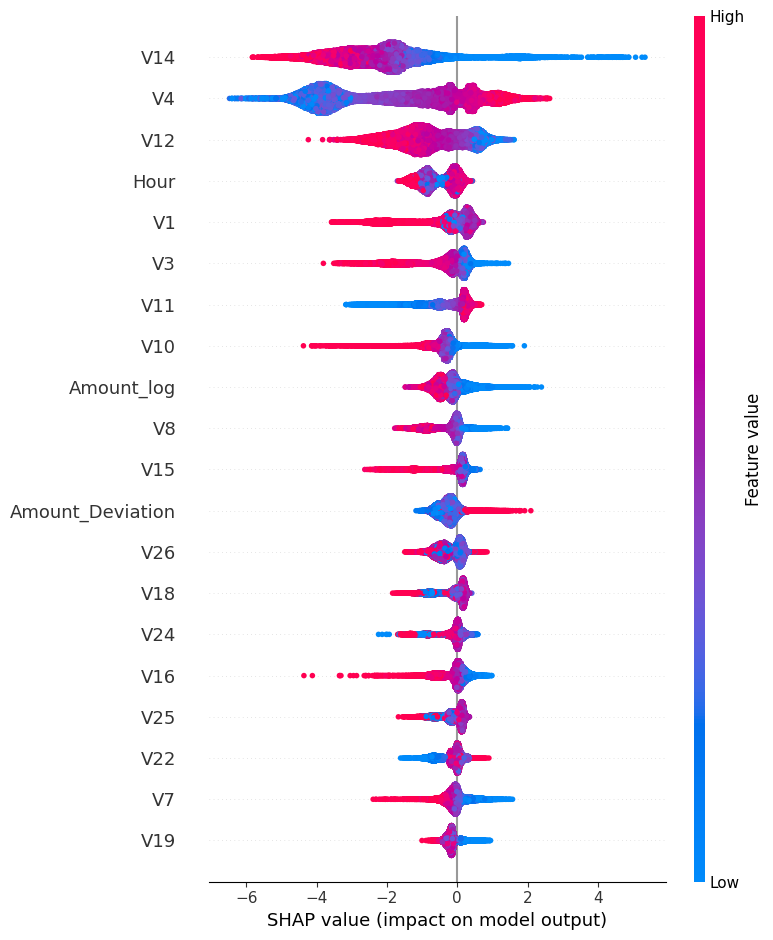

In [39]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [43]:
# If binary classification
shap_values = explainer(X_test)

# For XGBoost binary model:
shap_array = shap_values.values

# Mean absolute SHAP value per feature
mean_abs_shap = np.abs(shap_array).mean(axis=0)

# Create dataframe
shap_importance = pd.DataFrame({
    "Feature": X_test.columns,
    "Mean_Abs_SHAP": mean_abs_shap
}).sort_values(by="Mean_Abs_SHAP", ascending=False)

shap_importance.head(15)


,Feature,Mean_Abs_SHAP
13,V14,2.317955
3,V4,2.091311
11,V12,1.008330
30,Hour,0.568636
0,V1,0.545992
2,V3,0.516487
10,V11,0.474580
9,V10,0.421083
29,Amount_log,0.362405
7,V8,0.335723


Feature Importance

In [40]:
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": model.feature_importances_
})

feature_importance = feature_importance.sort_values(
    by="Importance", ascending=False
)

feature_importance.head(10)

,Feature,Importance
13,V14,0.586390
3,V4,0.064001
9,V10,0.036817
11,V12,0.035736
2,V3,0.019156
29,Amount_log,0.018992
34,Night_Transaction,0.014791
0,V1,0.014693
16,V17,0.013463
7,V8,0.012882


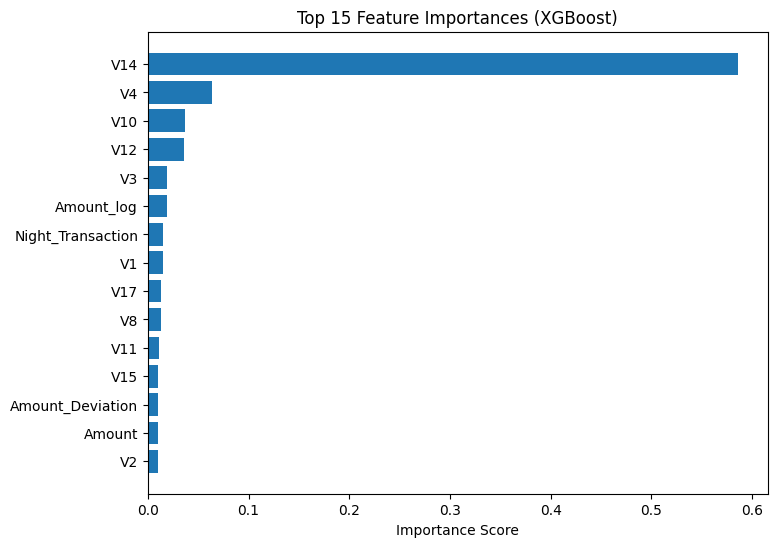

In [41]:
top_features = feature_importance.head(15)

plt.figure(figsize=(8,6))
plt.barh(top_features["Feature"], top_features["Importance"])
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances (XGBoost)")
plt.xlabel("Importance Score")
plt.show()


In [42]:
feature_importance.head(15)

,Feature,Importance
13,V14,0.586390
3,V4,0.064001
9,V10,0.036817
11,V12,0.035736
2,V3,0.019156
29,Amount_log,0.018992
34,Night_Transaction,0.014791
0,V1,0.014693
16,V17,0.013463
7,V8,0.012882
